In [5]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline


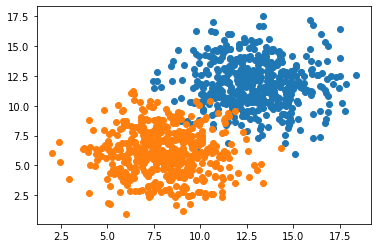

In [6]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [7]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam=Adam(lr = 0.1 )
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y, verbose=1, batch_size=50,epochs=500, shuffle='true')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
20/20 [==============================] - 1s 1ms/step - loss: 5.0400 - accuracy: 0.4960
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 1.2192 - accuracy: 0.5310
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.6090
Epoch 4/500
20/20 [==============================] - 0s 989us/step - loss: 0.5715 - accuracy: 0.7080
Epoch 5/500
20/20 [==============================] - 0s 998us/step - loss: 0.4987 - accuracy: 0.7650
Epoch 6/500
20/20 [==============================] - 0s 930us/step - loss: 0.4446 - accuracy: 0.8200
Epoch 7/500
20/20 [==============================] - 0s 963us/step - loss: 0.3934 - accuracy: 0.8680
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.9060
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.9230
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.9390
E

Text(0.5, 0, 'epoch')

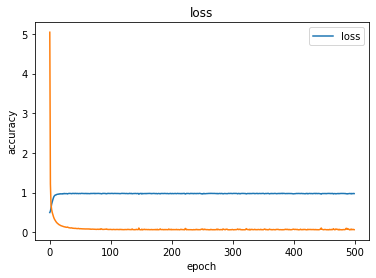

In [8]:
plt.plot(h.history['accuracy'])
 
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
 
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [11]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)


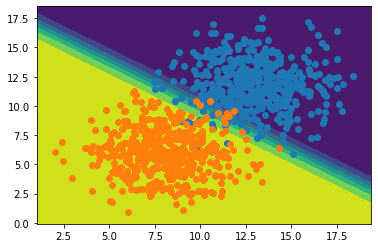

In [12]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

prediction is:  [[0.9999964]]


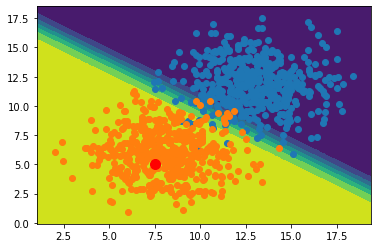

In [13]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
 
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)